**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder , OrdinalEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score , mean_squared_error

**Importing Dataset**

In [2]:
df = pd.read_csv(r"E:\#Data Science Innomatics\Module 6 Ai-ML\Datasets\Datasets\car_prediction_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Exploratort Data Analysis**

In [3]:
df.shape

(301, 9)

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Duplicates Values Identification and Treatment**

In [6]:
df.duplicated().sum()

2

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

**Missing Values Identification and Treatment**

In [9]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

**Dropping Unwanted Columns**

In [11]:
df.drop(['Selling_Price' , 'Car_Name'] , axis=1 , inplace=True)

In [12]:
df.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0


**Structural Error Handling**

In [13]:
for i in df.columns:
    print(i , df[i].unique())

Year [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
Present_Price [ 5.59   9.54   9.85   4.15   6.87   9.83   8.12   8.61   8.89   8.92
  3.6   10.38   9.94   7.71   7.21  10.79   5.09   7.98   3.95   5.71
  8.01   3.46   4.41   4.99   5.87   6.49   5.98   4.89   7.49   9.95
  8.06   7.74   7.2    2.28   3.76   7.87   3.98   7.15   2.69  12.04
  9.29  30.61  19.77  10.21  15.04   7.27  18.54   6.8   35.96  18.61
  7.7   36.23   6.95  23.15  20.45  13.74  20.91   6.76  12.48   8.93
 14.68  12.35  22.83  14.89   7.85  25.39  13.46  23.73  92.6    6.05
 16.09  13.7   22.78  18.64   1.9    1.82   1.78   1.6    1.47   2.37
  3.45   1.5    2.4    1.4    1.26   1.17   1.75   0.95   0.8    0.87
  0.84   0.82   0.81   0.74   1.2    0.787  0.99   0.94   0.826  0.55
  0.88   0.51   0.52   0.54   0.73   0.83   0.64   0.72   1.05   0.57
  0.48   0.58   0.47   0.75   0.65   0.32   6.79   5.7    4.6    4.43
  7.13   8.1   14.79  13.6    9.4    7.6    9.9    6.82   

In [14]:
def own(n):
    if n == 0:
        return 1
    elif n == 1:
        return 2
    else:
        return 3
    
df['Owner'] = df['Owner'].apply(own)

In [15]:
df

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,1
1,2013,9.54,43000,Diesel,Dealer,Manual,1
2,2017,9.85,6900,Petrol,Dealer,Manual,1
3,2011,4.15,5200,Petrol,Dealer,Manual,1
4,2014,6.87,42450,Diesel,Dealer,Manual,1
...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,1
297,2015,5.90,60000,Petrol,Dealer,Manual,1
298,2009,11.00,87934,Petrol,Dealer,Manual,1
299,2017,12.50,9000,Diesel,Dealer,Manual,1


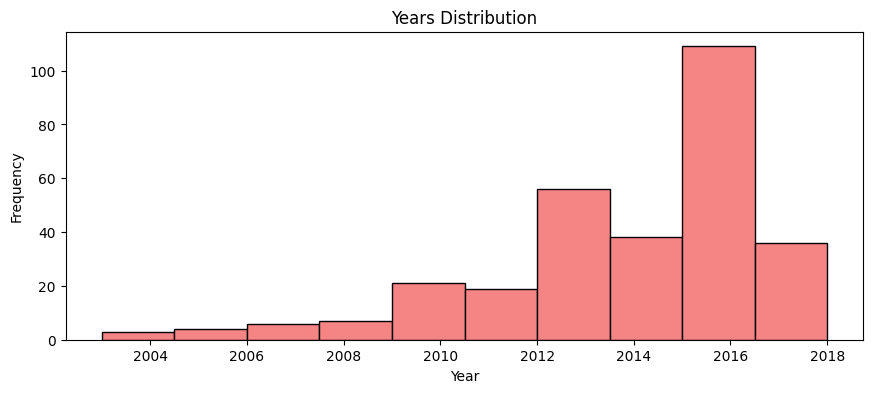

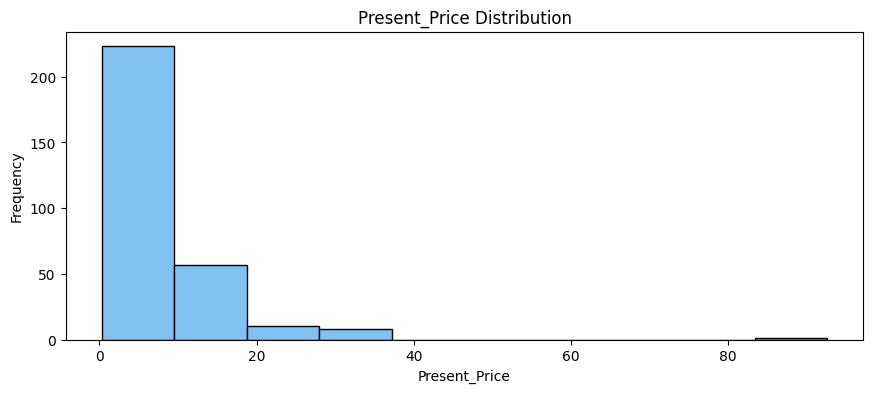

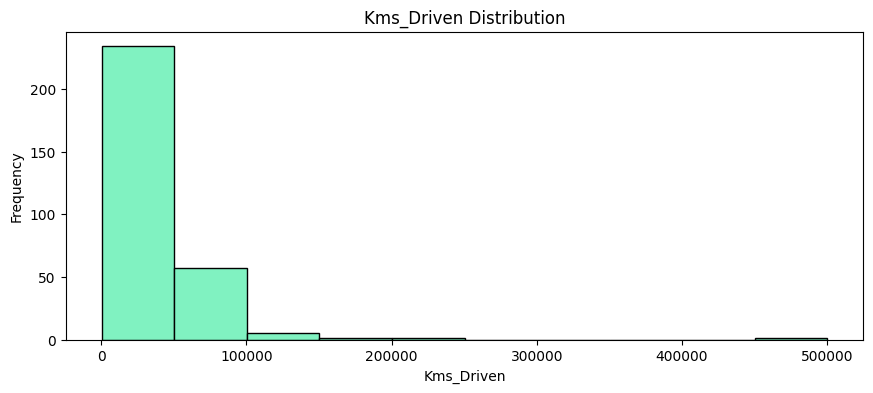

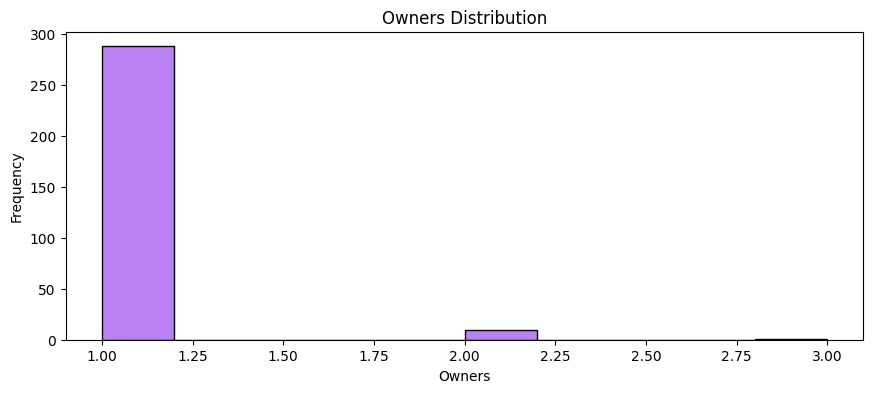

In [16]:
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
plt.hist(df['Year'] , color='#f58484' , edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Years Distribution')
plt.show()

plt.figure(figsize=(35,4))
plt.subplot(1,3,2)
plt.hist(df['Present_Price'] , color='#80c1f2' , edgecolor='black')
plt.xlabel('Present_Price')
plt.ylabel('Frequency')
plt.title('Present_Price Distribution')
plt.show()

plt.figure(figsize=(35,4))
plt.subplot(1,3,3)
plt.hist(df['Kms_Driven'] , color='#80f2c1' , edgecolor='black')
plt.xlabel('Kms_Driven')
plt.ylabel('Frequency')
plt.title('Kms_Driven Distribution')
plt.show()

plt.figure(figsize=(35,4))
plt.subplot(1,3,3)
plt.hist(df['Owner'] , color='#bb80f2' , edgecolor='black')
plt.xlabel('Owners')
plt.ylabel('Frequency')
plt.title('Owners Distribution')
plt.show()

Year                 Axes(0.125,0.77;0.352273x0.11)
Present_Price     Axes(0.547727,0.77;0.352273x0.11)
Kms_Driven          Axes(0.125,0.638;0.352273x0.11)
Owner            Axes(0.547727,0.638;0.352273x0.11)
dtype: object

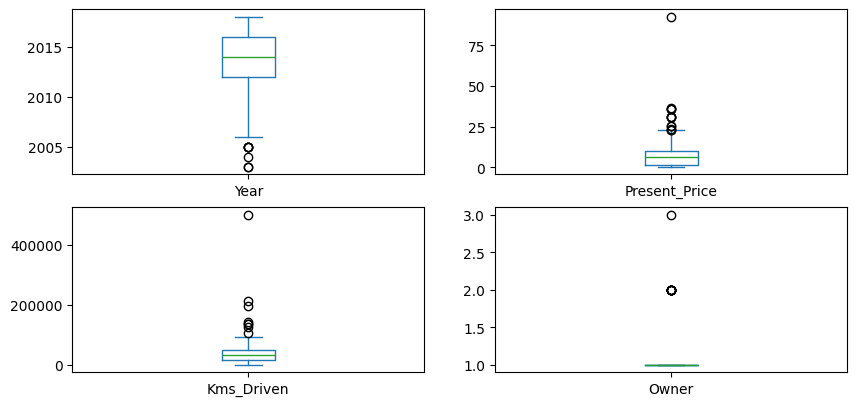

In [17]:
df_numeric = df.select_dtypes(include = ['int64' , 'float64'])

df_numeric.plot(kind='box' , subplots = True , layout = (6,2) , figsize = (10,15))

In [18]:
df

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,1
1,2013,9.54,43000,Diesel,Dealer,Manual,1
2,2017,9.85,6900,Petrol,Dealer,Manual,1
3,2011,4.15,5200,Petrol,Dealer,Manual,1
4,2014,6.87,42450,Diesel,Dealer,Manual,1
...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,1
297,2015,5.90,60000,Petrol,Dealer,Manual,1
298,2009,11.00,87934,Petrol,Dealer,Manual,1
299,2017,12.50,9000,Diesel,Dealer,Manual,1


<Axes: title={'center': 'Fuel Type distribution'}, xlabel='Fuel_Type'>

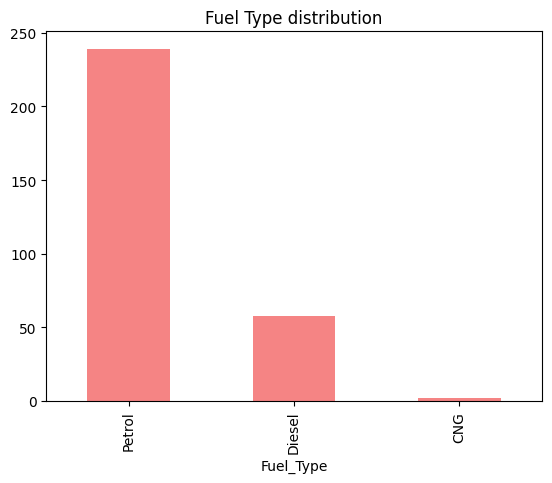

In [19]:
df['Fuel_Type'].value_counts().plot(kind='bar' , color='#f58484' , title ='Fuel Type distribution')

<Axes: title={'center': 'Transmission Type distribution'}, xlabel='Transmission'>

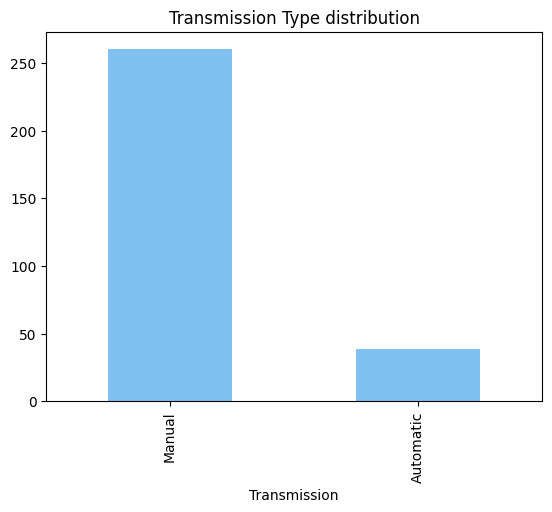

In [20]:
df['Transmission'].value_counts().plot(kind='bar' , color='#80c1f2' , title ='Transmission Type distribution')

<Axes: title={'center': 'Seller Type distribution'}, xlabel='Seller_Type'>

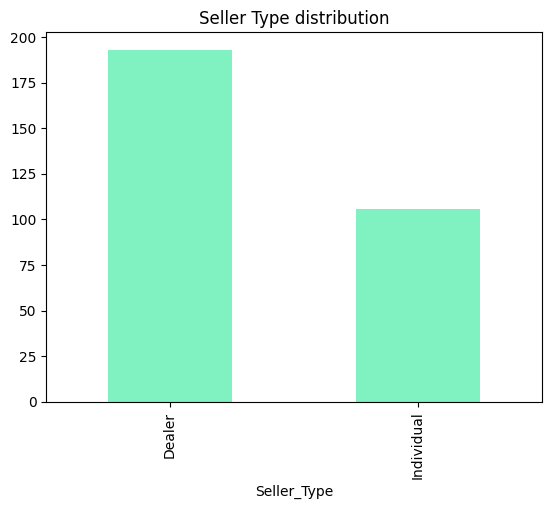

In [21]:
df['Seller_Type'].value_counts().plot(kind='bar' , color='#80f2c1' , title ='Seller Type distribution')

**Data Preprocessing**

In [22]:
X = df.drop('Present_Price' , axis=1)
y = df['Present_Price']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=13)

In [23]:
cat_col = X_train.select_dtypes(include='object').columns
num_col = X_train.select_dtypes(exclude='object')

In [24]:
num_col

,Year,Kms_Driven,Owner
69,2016,12000,1
109,2017,11000,1
53,2013,135000,1
103,2017,1200,1
243,2016,7000,1
...,...,...,...
246,2012,35000,1
232,2015,12900,1
16,2015,41678,1
75,2015,36000,1


In [25]:
lab = OneHotEncoder()
lab.fit(X_train[cat_col])
X_train = pd.DataFrame(lab.transform(X_train[cat_col]).toarray() , columns=lab.get_feature_names_out())

X_test = pd.DataFrame(lab.transform(X_test[cat_col]).toarray() , columns=lab.get_feature_names_out())


In [26]:
X_train

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
234,0.0,0.0,1.0,1.0,0.0,0.0,1.0
235,0.0,0.0,1.0,1.0,0.0,1.0,0.0
236,0.0,1.0,0.0,1.0,0.0,0.0,1.0
237,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [27]:
pd.concat([num_col , X_train] , axis=1)

,Year,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
69,2016.0,12000.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
109,2017.0,11000.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
53,2013.0,135000.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
103,2017.0,1200.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
243,2016.0,7000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
213,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0
216,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,1.0
221,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,1.0
228,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0
